In [139]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from PIL import Image
%matplotlib inline

In [35]:
PTH = '/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/'

In [51]:
D = {}
for f in tqdm(os.listdir(PTH)):
    fn = PTH + f
    x = np.load(fn)
    D[fn] = [np.concatenate(x).sum()]

100%|██████████| 961/961 [00:02<00:00, 354.58it/s]


In [ ]:
D

In [59]:
Ddf = pd.DataFrame.from_dict(D,orient='index',columns=['sum'])

In [62]:
Ddf.head()

,sum
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX9813.npy,113.237137
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4246.npy,10.681933
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4993.npy,11.753131
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4627.npy,76.495880
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX4151.npy,70.366226


In [73]:
D_sorted = Ddf.sort_values(by=['sum'],ascending=False)

In [80]:
D_sorted['sum'].median()

58.48186111450195

In [89]:
D_sorted.loc[abs(D_sorted['sum'] - D_sorted['sum'].mean()) < 500]

,sum
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5765.npy,2011.744385
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5749.npy,2001.663208
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5262.npy,1902.500244
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5265.npy,1888.469482
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5748.npy,1887.414429
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5773.npy,1868.997070
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5263.npy,1848.819824
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5766.npy,1702.116577
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_100RECNX_RCNX5259.npy,1642.082275
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5735.npy,1576.044434


In [312]:
D_sorted.head(10)

,sum
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5764.npy,258329.906250
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5732.npy,138565.125000
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5733.npy,127987.781250
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5780.npy,114296.585938
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5731.npy,112309.578125
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5779.npy,94894.281250
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5760.npy,83521.476562
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5783.npy,82543.882812
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5761.npy,70994.078125
/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5785.npy,68469.250000


---

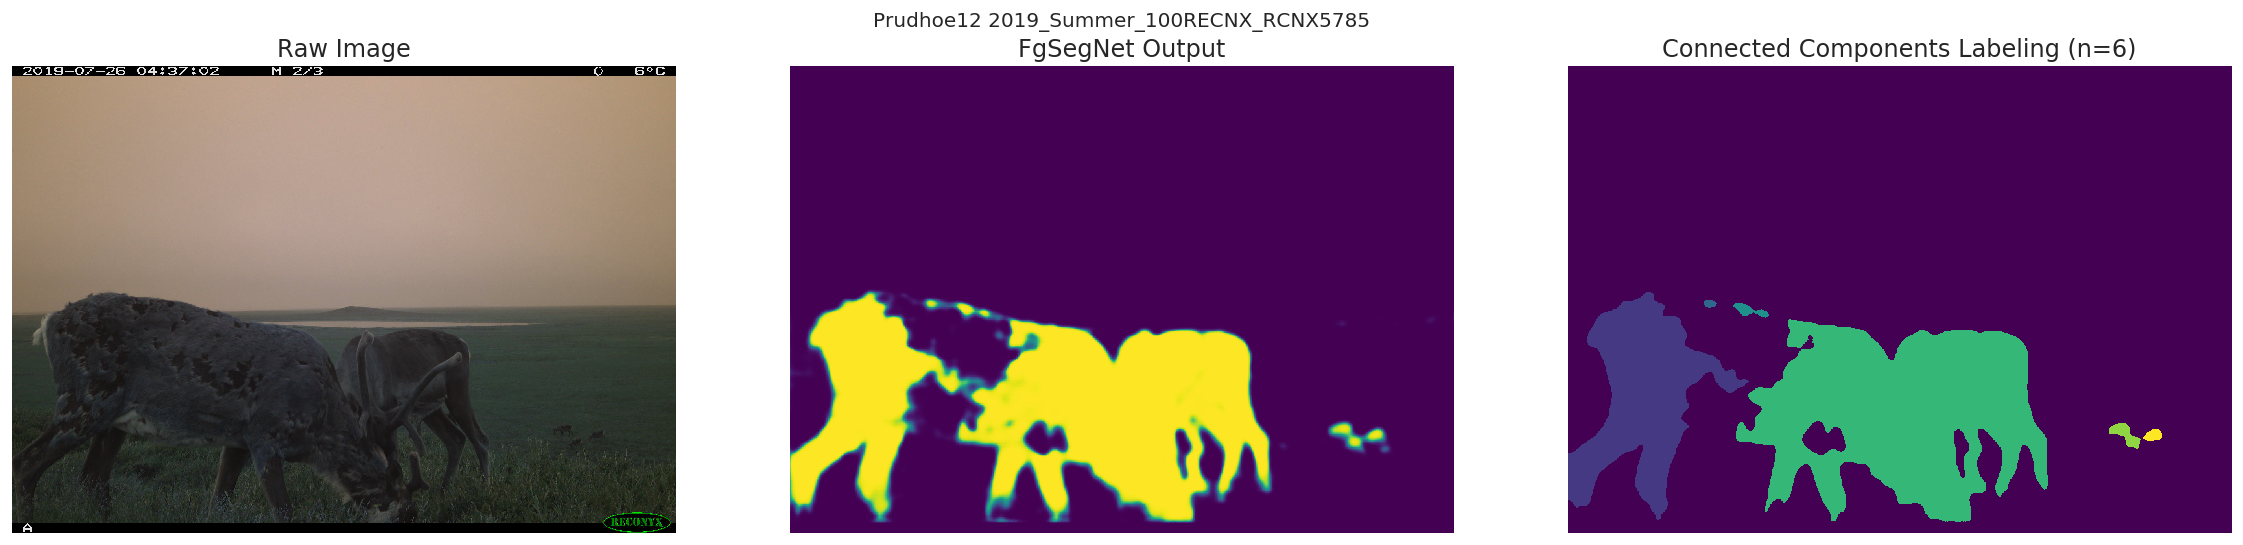

In [447]:
# load npy array
x = np.load('/scratch/richardso21/20-21_BGSUB/archive/FgSegNet_O_old/200/prudhoe_12/pos/2019_Summer_100RECNX_RCNX5732.npy')
# get its threshold
x_th = x > 0.5
# convert to OpenCV usable type
x_img = x_th.astype('uint8')

# perform simple connected components
num_labels, labels_im = cv2.connectedComponents(x_img)

# read raw image
y = cv2.imread('/tank/data/nna/cameraTrap/prudhoe/12/2019_Summer/100RECNX/RCNX5732.JPG')

# plot
fig = plt.figure(figsize=(20,5), dpi=120)
fig.suptitle('Prudhoe12 2019_Summer_100RECNX_RCNX5785')
ax1 = fig.add_subplot(132)
ax1.imshow(x)
ax1.axis('off')
ax1.set_title('FgSegNet Output')
ax2 = fig.add_subplot(133)
ax2.imshow(labels_im)
ax2.axis('off')
ax2.set_title(f'Connected Components Labeling (n={num_labels - 1})')
ax3 = fig.add_subplot(131)
ax3.imshow(y)
ax3.axis('off')
ax3.set_title('Raw Image')
plt.tight_layout(pad=4)
plt.savefig('conncomp_limitation.png')

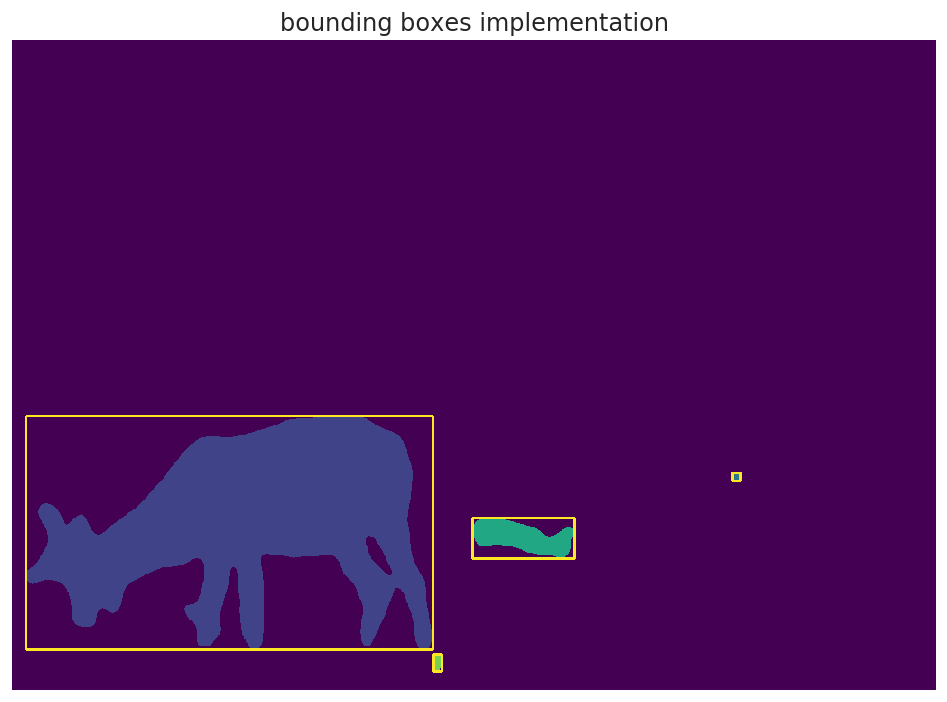

In [441]:
img = np.array(labels_im)
for i in range(1, num_labels):
    x,y,w,h = cv2.boundingRect((labels_im == i).astype('uint8'))
    cv2.rectangle(img, (x,y), (x+w,y+h), num_labels, 2)
fig = plt.figure(figsize=(8,6), dpi=120)
ax = fig.add_subplot(111)
ax.imshow(img)
ax.axis('off')
ax.set_title("bounding boxes implementation")
plt.tight_layout()
plt.savefig('bounding_boxes.png')